Importing required libraries.

In [876]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement

Reading data from file.

In [877]:
traindata = np.loadtxt('./traindata.txt')
X_train = traindata[:, :-1]
np.random.shuffle(X_train)
Y_train = traindata[:, -1]
np.random.shuffle(Y_train)

X_test = np.loadtxt('./testinputs.txt')

Function to calculate the weight vector from given design matrix and actual output data. 

In [878]:
def solve(Z, y):
    return np.linalg.solve(Z @ Z.T, Z @ y)

Function to calculate Residual Sum of Squares (RSS) given weight vector, design matrix, and actual output data. 

In [879]:
def RSS(W, Z, y):
    return np.mean(((Z.T @ W) - y) ** 2)

Calculating the design matrix for given polynomial order. This includes interaction items too because of the clever use of "combinations_with_replacement". 

In [880]:
def poly_expand(x, p):
    n, d = x.shape
    features = [np.ones((n, 1))]
    
    for degree in range(1, p+1):
        for combination in combinations_with_replacement(range(d), degree):
            feat = np.prod(x[:, combination], axis = 1).reshape(-1, 1)
            features.append(feat)

    return np.hstack(features)

K-fold Cross Validation code.

In [881]:
def kfold_cv(x, y, p, K):
    Z  = poly_expand(x, p).T 
    N = y.shape[0]
    test_Rs = []
    train_Rs = []
    
    for fold in range(K):
        start = int(fold / K * N)
        end = int((fold + 1) / K * N)

        # boolean mask
        mask = np.ones(N, dtype=bool)
        mask[start:end] = False # test indices set to False

        # split
        train_x, train_y = Z[:, mask], y[mask, :]
        test_x,  test_y  = Z[:, ~mask], y[~mask, :]

        # fit on train
        W = solve(train_x, train_y)

        # compute residuals
        train_R = RSS(W, train_x, train_y)
        test_R = RSS(W, test_x, test_y)

        test_Rs.append(test_R)
        train_Rs.append(train_R)
        
    return np.sum(train_Rs) / len(train_Rs), np.sum(test_Rs) / len(test_Rs)

Do cross-validation on different orders of polynomial. 

In [882]:
test_cvs = []
train_cvs = []
order_range = 5 

for order in range(1, order_range):
    train_cv, test_cv = kfold_cv(X_train, Y_train.reshape(-1, 1), p = order, K = 5)

    train_cvs.append(train_cv)
    test_cvs.append(test_cv)

Plotting average validation errors from k-fold Cross Validation of each basis expansion i.e. for all orders of polynomials in the given range. 

[np.float64(280.78908039307703), np.float64(266.59438998642656), np.float64(218.96311611318646), np.float64(107.20958359486062)]
[np.float64(289.97430068381493), np.float64(310.9654286846943), np.float64(470.4304054504135), np.float64(2053705.9539537702)]


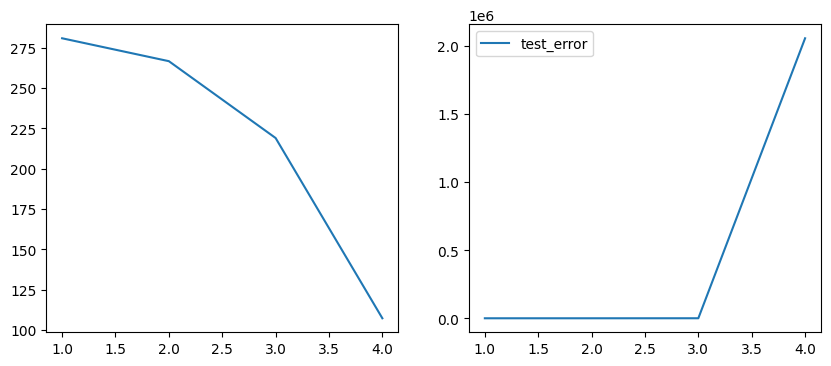

In [883]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))

ax1.plot([i for i in range(1, order_range)], train_cvs, label = "train_error")
print(train_cvs)
ax2.plot([i for i in range(1, order_range)], test_cvs, label = "test_error")
print(test_cvs)
plt.legend()

plt.show()